In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42
shipping = pd.read_csv('data/people.csv')


In [3]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87048 entries, 0 to 87047
Data columns (total 21 columns):
person_id           87048 non-null int64
id                  87048 non-null object
type                87048 non-null object
parent              87048 non-null object
name                86990 non-null object
dob                 16573 non-null object
age                 69755 non-null float64
place_of_birth      85660 non-null object
home_address        13283 non-null object
name_of_ship        85022 non-null object
ship_port           69996 non-null object
date_leaving        70858 non-null object
joined_ship_date    78873 non-null object
joined_at_port      77337 non-null object
capacity            86606 non-null object
date_left           66774 non-null object
left_port           65534 non-null object
cause_of_leaving    82216 non-null object
sign_with_mark      85833 non-null object
notes               9785 non-null object
Unnamed: 20         31 non-null object
dtypes: float

In [4]:
shipping.head()

,person_id,id,type,parent,name,dob,age,place_of_birth,home_address,name_of_ship,...,date_leaving,joined_ship_date,joined_at_port,capacity,date_left,left_port,cause_of_leaving,sign_with_mark,notes,Unnamed: 20
0,33522,vtls004589021_0_13,sailor,vtls004589021,william cunningham,NaN,19.0,liverpool,NaN,adroit,...,1873-12,1874-01-01,NaN,ordinary seaman,1874-03-19,newcastle,discharged,n,NaN,NaN
1,33523,vtls004589021_0_14,sailor,vtls004589021,evan griffiths,NaN,21.0,portmadoc,NaN,jane owens,...,1874-04,1874-05-15,porthmadog,able seaman,NaN,NaN,remains on board,n,remains on board,NaN
2,33524,vtls004589021_0_12,sailor,vtls004589021,henry evans,NaN,27.0,aberystwyth,NaN,adroit,...,1873-12,1874-01-01,NaN,bosun,NaN,NaN,remains on board,n,remains on board,NaN
3,33525,vtls004589069_0_14,sailor,vtls004589069,david evans,NaN,16.0,aberaeron,NaN,adroit,...,remains,1876-01-01,maryport,ordinary seaman,NaN,NaN,remains on board,n,remains on board,NaN
4,33526,vtls004589021_1_13,sailor,vtls004589021,richard jones,NaN,20.0,aberystwyth,NaN,adroit,...,1874-06,1874-07-01,NaN,ordinary seaman,NaN,NaN,remains on board,n,remains on board,NaN


In [5]:
len(shipping)

87048

In [6]:
shipping.describe(include="all")

,person_id,id,type,parent,name,dob,age,place_of_birth,home_address,name_of_ship,...,date_leaving,joined_ship_date,joined_at_port,capacity,date_left,left_port,cause_of_leaving,sign_with_mark,notes,Unnamed: 20
count,87048.000000,87048,87048,87048,86990,16573,69755.000000,85660,13283,85022,...,70858,78873,77337,86606,66774,65534,82216,85833,9785,31
unique,NaN,87048,1,5659,27769,147,NaN,4697,7179,18241,...,5043,12519,1075,425,11523,1262,128,13,6210,26
top,NaN,vtls004629594_1_12,sailor,vtls004640036,john jones,1866,NaN,aberystwyth,aberystwyth,first ship,...,continued,continued,cardiff,able seaman,remains,liverpool,discharged,n,remains on board,see above note
freq,NaN,1,87048,172,1909,560,NaN,12367,801,1530,...,3212,1449,9807,26270,1206,5608,51836,78821,362,3
mean,77045.500000,NaN,NaN,NaN,NaN,NaN,29.104107,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,25128.737453,NaN,NaN,NaN,NaN,NaN,11.670387,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,33522.000000,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,55283.750000,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,77045.500000,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,98807.250000,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
null_columns = shipping.columns[shipping.isnull().any()]
shipping[null_columns].isnull().sum()

name                   58
dob                 70475
age                 17293
place_of_birth       1388
home_address        73765
name_of_ship         2026
ship_port           17052
date_leaving        16190
joined_ship_date     8175
joined_at_port       9711
capacity              442
date_left           20274
left_port           21514
cause_of_leaving     4832
sign_with_mark       1215
notes               77263
Unnamed: 20         87017
dtype: int64

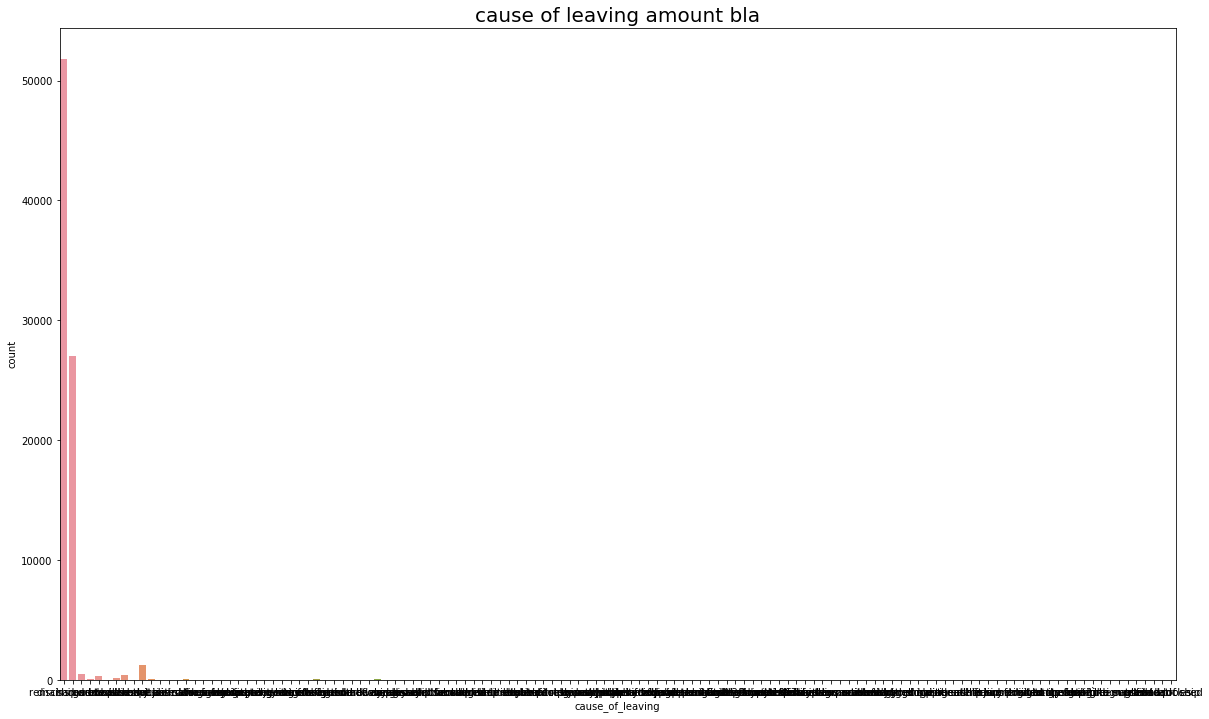

In [13]:
plt.figure(figsize=(20,12))
sns.countplot(x='cause_of_leaving', data=shipping, order=shipping.cause_of_leaving.value_counts().iloc[:7].index)
plt.title("cause of leaving amount bla", fontsize=20)
plt.show()

In [14]:
shipping['cause_of_leaving'].value_counts()

discharged             51836
remains on board       27064
did not join            1206
shipwreck                495
illness                  367
drowned                  286
deceased                 194
juristical reasons        99
deserted                  89
leaving                   65
transferred               61
hospitalised              36
ship sold                 26
term.                     22
ship laid up              20
n                         20
abandoned                 20
vessel sank               17
voluntary                 16
vessel foundered          15
other                     15
injured                   13
crew scuttled ship        12
end of voyage             10
no cause                   9
going home                 8
ship foundered             8
y                          8
discharge                  7
refused to proceed         7
                       ...  
shipping                   1
change to mate             1
necessary                  1
illnesscal rel